In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import re

In [5]:
def CreateGlobalOrderDF(dirName="."):
    """
    DOCSTRING
    """
    assert isinstance(dirName, str), "The 'dirName' argument must be a string!"
    fileNames = [dirName+'/'+i for i in listdir(dirName) if i[-13:] == '.global_order']
    
    if len(fileNames)==0:
        print("No '.global_order' files found in directory '"+dirName+"'.")
        return
    
    D = {"file_name" : []}
    for index,name in enumerate(fileNames):
        f = open(name,'r')
        for i in range(2): colNames = f.readline().split()
        if index == 0:
            for colName in colNames:
                D[colName] = []
        D["file_name"].append(name)
        simParams = f.readline().split()
        for colIndex,colName in enumerate(colNames):
            D[colName].append(float(simParams[colIndex]))
        f.close()
    df = pd.DataFrame(D)
    return df

def PlotGlobalOrder(dirName,fname):
    nameLen = len(fname)
    fileNames = [dirName+'/'+i for i in listdir(dirName) if (i[:nameLen] == fname and i[-13:] == '.global_order')]
    if len(fileNames) == 0:
        print("No '.global_order' files with that root file name found")
        return
    df = pd.DataFrame()
    for name in fileNames:
        df = df.append(GetGlobalOrderTimeSequence(name),ignore_index=True)
    return df
    

def GetGlobalOrderTimeSequence(fname):
    df = pd.read_csv(fname,sep=' ',skiprows=1,header=0,index_col=0)
    return df

def maxEig(xx,xy,yx,yy):
    return max(np.linalg.eig(np.array([[xx,xy],[yx,yy]]))[0])

def CalculateGlobalOrderMagnitudes(df):
    df['polar_order_mag'] = np.sqrt(df.polar_order_x**2 + df.polar_order_y**2 + df.polar_order_z**2)
    df['nematic_order_mag'] = df.apply(lambda x: maxEig(x['nematic_order_xx'], x['nematic_order_xy'], x['nematic_order_yx'], x['nematic_order_yy']), axis=1)

In [6]:
df = CreateGlobalOrderDF('.')
s=set()
for i in df.file_name:
    #matchObj = re.search('soft_pf0.\d{1,2}_sp\d{3}_lp\d{3}', i)
    matchObj = re.search('soft_pf0.\d{1,2}_l\d{3}_d\d{3}_sp\d{3}_lp\d{3}',i)
    s.add(matchObj.group())

In [7]:
for fname in s:
    df=PlotGlobalOrder('.',fname)
    CalculateGlobalOrderMagnitudes(df)
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    df.plot(x=df.index,y='spiral_order',ax=ax,label='Spiral order magnitude')
    df.plot(x=df.index,y='signed_spiral_order',ax=ax,label='Spiral handedness')
    ax.set_xlabel("Time",fontsize=18)
    ax.set_ylabel("Spiral order parameter",fontsize=18)
    ax.set_title(fname,fontsize=20)
    ax.legend(fontsize=15)
    ax.grid(True)
    fig.savefig('/Users/jeff/Desktop/GlobalOrderPlots/'+fname+'_spiral_order.png')
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    df.plot(x=df.index,y='nematic_order_mag',ax=ax,label='Nematic order')
    df.plot(x=df.index,y='polar_order_mag',ax=ax,label='Polar order')
    ax.set_xlabel("Time",fontsize=18)
    ax.set_ylabel("Order parameter",fontsize=18)
    ax.set_title(fname,fontsize=20)
    ax.legend(fontsize=15)
    ax.grid(True)
    fig.savefig('/Users/jeff/Desktop/GlobalOrderPlots/'+fname+'_nematic_order.png')

/usr/local/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


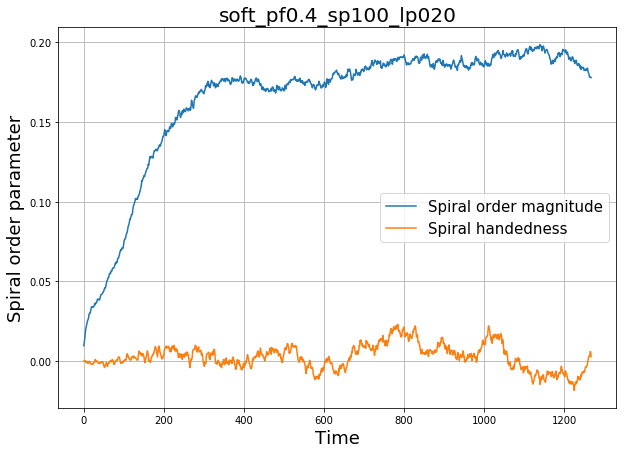

In [11]:

plt.show()

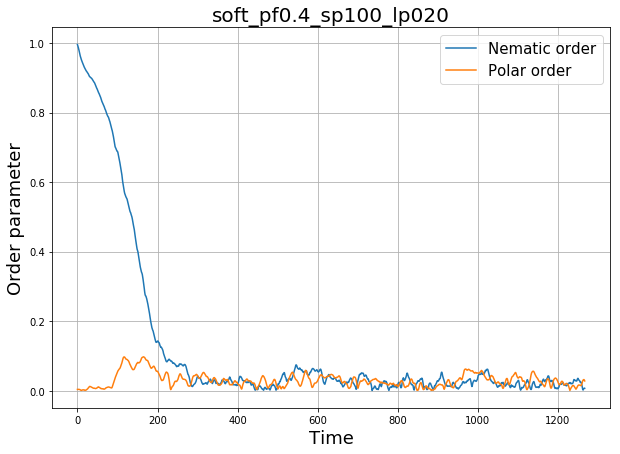

In [12]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
df.plot(x=df.index,y='nematic_order_mag',ax=ax,label='Nematic order')
df.plot(x=df.index,y='polar_order_mag',ax=ax,label='Polar order')
ax.set_xlabel("Time",fontsize=18)
ax.set_ylabel("Order parameter",fontsize=18)
ax.set_title(fname,fontsize=20)
ax.legend(fontsize=15)
ax.grid(True)
fig.savefig('/Users/jeff/Desktop/'+fname+'nematic_order.png')
plt.show()

In [28]:
for i in s:
    print(i)

soft_pf0.4_sp050_lp050
soft_pf0.4_sp100_lp050
soft_pf0.4_sp015_lp100
soft_pf0.04_sp100_lp020
soft_pf0.4_sp015_lp050
soft_pf0.4_sp100_lp020
soft_pf0.4_sp015_lp020
soft_pf0.4_sp025_lp050
soft_pf0.04_sp100_lp050
soft_pf0.4_sp050_lp020
soft_pf0.4_sp060_lp100
soft_pf0.4_sp025_lp020
soft_pf0.4_sp025_lp100
